# PROYECTO PARCIAL DE ANALISIS EXPLORATORIO DE DATOS

## Importaciones 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de DataSets

En esta parte cargamos los datasets y añadimos las columnas extras necesarias:
  - vistas --> rp_vistas_c.csv
  - sitios --> ma_sitios2.csv  --> Añadir columna de ubicacion basada en su latitud y longitud

## Dataframe Vistas
Registros de personas que intentaron conectarse a un sitio y se arrepintieron o tuvieron que intentarlo más de una vez

**Observación:** Este dataframe es muchísimo más grande que el de Conexiones, debido a que se nos proporcionó registros adicionales de un período más extenso de tiempo; el mismo período de tiempo adicional no se pudo recuperar para la tabla conexiones.


In [3]:
vistas = pd.read_csv('rp_vistas_c.csv',sep=';',index_col=False, parse_dates={'datetime':['fecha','hora']}, usecols=["codigo","pauta_id","sitio_id","mac_usr","fecha","hora","so","navegador"])
vistas.head(3)

,datetime,codigo,pauta_id,sitio_id,mac_usr,so,navegador
0,2015-05-15 20:15:09,1,20,3,74:AA:FE:A5:7E:90,ANDROID,CXHROME
1,2015-05-15 20:15:28,3,18,3,74:AA:FE:A5:7E:90,ANDROID,CHROME
2,2015-05-15 20:15:31,4,20,3,B4:52:7E:3F:CF:B4,ANDROID,CHROME


Se necesita parsear la columna datatime al formato correcto, y separaremos los valores en varias columnas

In [4]:
vistas["mes"] = vistas["datetime"].dt.month
vistas["anio"] = vistas["datetime"].dt.year
vistas["hora"] = vistas["datetime"].dt.hour
vistas["fecha"] = vistas["datetime"].dt.date
vistas["weekday"] = vistas["datetime"].dt.weekday
vistas.head(2)

,datetime,codigo,pauta_id,sitio_id,mac_usr,so,navegador,mes,anio,hora,fecha,weekday
0,2015-05-15 20:15:09,1,20,3,74:AA:FE:A5:7E:90,ANDROID,CXHROME,5,2015,20,2015-05-15,4
1,2015-05-15 20:15:28,3,18,3,74:AA:FE:A5:7E:90,ANDROID,CHROME,5,2015,20,2015-05-15,4


Analizaremos algunos de los valores para ver que tenemos, en este caso, so, navegador y fabricante-dispositivo, seran objeto del analisis.

In [5]:
# eliminar las macs que no son validas

validacionMAC = "^(([0-9A-Fa-f]{2}:){5})([0-9A-Fa-f]{2})$"

vistas["filtroMAC"] = vistas['mac_usr'].str.contains(validacionMAC)
# data = data[filter]

# print(data)

vistas = vistas[vistas["filtroMAC"] == True]

# print(nuevoData)

del vistas["filtroMAC"]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


## SO 

### en Vistas

In [ ]:
vistas["so"].value_counts()

Podemos observar que existen valores que podemos englobar en uno solo, para un mejor analisis.

### Categorizar SO 

In [6]:
def clasificadorSO(so):
    try:
        if so.lower().startswith("windows"):
            return "WINDOWS"
        if so.lower().startswith("android"):
            return "ANDROID"
        if so.lower() == "ipad" or so.lower() == "iphone" or so.lower() == "ios" or so.lower() == "mac" or so.lower() == "mac os x":
            return "iOS"
        if so.lower().startswith("linux"):
            return "LINUX"
        if so.lower() == "otros":
            return "Other"
        return so
    except:
        return "Other"

In [7]:
vistas["so"]  = vistas["so"].apply(lambda x: clasificadorSO(x))
vistas["so"].value_counts()

ANDROID       1161488
iOS            469122
Other           82280
WINDOWS         70871
NOKIA            7900
BLACKBERRY       2891
WINPHONE         1540
LINUX             943
Name: so, dtype: int64

# Navegador 

In [8]:
vistas["navegador"].value_counts()

CHROME        832811
OTROS         482840
SAFARI        436740
IE             25210
FIREFOX        17617
BLACKBERRY      1698
OPERA             64
MOZILLA           54
CXHROME            1
Name: navegador, dtype: int64

Podemos observar que Other y Otros se refieren a lo mismo por lo tanto no deberia existir distincion.

### Categorizar Navegador

In [9]:
def clasificadorNavegador(navegador):
    try:
        if str(navegador.lower()) == "otros" or str(navegador.lower()) == "opera":
            return "OTHER"
        if navegador.lower() == "cxhrome":
            return "CHROME"
        if str(navegador.lower()) == "mozilla" or str(navegador.lower()) == "firefox":
            return "FIREFOX"
        return navegador
    except:
        return "OTHER"

In [10]:
vistas["navegador"] = vistas["navegador"].apply(lambda x: clasificadorNavegador(x))
vistas["navegador"].value_counts()

CHROME        832812
OTHER         482904
SAFARI        436740
IE             25210
FIREFOX        17671
BLACKBERRY      1698
Name: navegador, dtype: int64

## Sitios 

In [11]:
# sitios = pd.DataFrame.from_csv("ma_sitios2.csv", sep = ",").reset_index()
sitios = pd.read_csv('ma_sitios.csv', sep=',', index_col=False, usecols=["sitio_id","nombre","ciudad","longitud","latitud"])
sitios.head(3)

,sitio_id,nombre,ciudad,longitud,latitud
0,1,ALBAN BORJA,Guayaquil,-2.168677,-79.916769
1,2,VILLAGE PLAZA,Guayaquil,-2.140406,-79.866376
2,3,CITY MALL,Guayaquil,-2.140951,-79.911774


Como vemos contamos con latitud y longitud, para este analisis agregaremos una nueva columna llamada localizacion, en donde nos dara el lugar geografico donde se encuentra.

## expectativa de personas mensuales en centros comerciales

In [12]:
expectativa_cc = pd.DataFrame({"CentroComercial":["CentroConvenciones", "CityMall", "Aeropuerto", "MallSur", "Samborondon"], "poblacion_mensual":[55000,1200000,600000,1300000,750000]})
expectativa_cc

,CentroComercial,poblacion_mensual
0,CentroConvenciones,55000
1,CityMall,1200000
2,Aeropuerto,600000
3,MallSur,1300000
4,Samborondon,750000


## Localizar Sitios 

Necesitaremos el boundingbox de los lugares el cual lo llamaremos places

In [13]:
places =[["Urdesa", [[-79.915581,-2.178119], [-79.901204,-2.146938]]],
             ["MallSur", [[-79.902062,-2.232042], [-79.894681,-2.226038]]],
             ["CityMall", [[-79.912663,-2.143936], [-79.905968,-2.137932]]],
             ["AlbanBorja", [[-79.918242,-2.170096], [-79.915066,-2.167523]]],
             ["Samborondon", [[-79.874897,-2.160447], [-79.852066,-2.116704]]],
             ["Aeropuerto", [[-79.886227,-2.152728], [-79.880562,-2.146338]]],
             ["Penias", [[-79.8776014239,-2.1855487464], [-79.873009,-2.175392]]],
             ["Quito", [[-78.586922,-0.395161], [-78.274155,0.021973]]],
             ["CentroConvenciones", [[-79.893479,-2.161755], [-79.883652,-2.154894]]],
             ["HiltonColon", [[-79.8998951912,-2.160929558], [-79.8962903023,-2.1576274229]]],
             ["MallSol", [[-79.8954641819,-2.157053837], [-79.8891341686,-2.1539258197]]],
             ["UniversidadGuayaquil", [[-79.9008607864,-2.1847947751], [-79.8959684372,-2.1791554991]]]
            ]

Funcion para localizar las coordenadas

In [14]:
def localizar(row, places):
    longitud = float(row["longitud"])
    latitud = float(row["latitud"])

    for placeName, ubicacion in places:
        SW, NE= ubicacion
        if (latitud <= NE[0] and longitud <=NE[1] and latitud >= SW[0] and longitud >= SW[1]):
            return placeName
    return "No ubicado"

In [15]:
sitios['localizacion'] = sitios[["longitud", "latitud"]].apply(lambda row: localizar(row, places), axis = 1)
# sitios.to_csv("ma_sitios_filtered.csv")
# sitios[sitios["localizacion"].isin(["CentroConvenciones", "CityMall", "Aeropuerto", "MallSur", "Samborondon"])]["localizacion"].value_counts()


## aps por sitio

In [16]:
aps_cc = pd.DataFrame({"CentroComercial":["CentroConvenciones", "CityMall", "Aeropuerto", "MallSur", "Samborondon"], "#aps":[33,8,20,6,11]})
aps_cc

,#aps,CentroComercial
0,33,CentroConvenciones
1,8,CityMall
2,20,Aeropuerto
3,6,MallSur
4,11,Samborondon


# UNIENDO LOS DATAFRAMES

In [17]:
data_completa = pd.merge(vistas, sitios, on='sitio_id')
data_completa.head(3)

,datetime,codigo,pauta_id,sitio_id,mac_usr,so,navegador,mes,anio,hora,fecha,weekday,nombre,ciudad,longitud,latitud,localizacion
0,2015-05-15 20:15:09,1,20,3,74:AA:FE:A5:7E:90,ANDROID,CHROME,5,2015,20,2015-05-15,4,CITY MALL,Guayaquil,-2.140951,-79.911774,CityMall
1,2015-05-15 20:15:28,3,18,3,74:AA:FE:A5:7E:90,ANDROID,CHROME,5,2015,20,2015-05-15,4,CITY MALL,Guayaquil,-2.140951,-79.911774,CityMall
2,2015-05-15 20:15:31,4,20,3,B4:52:7E:3F:CF:B4,ANDROID,CHROME,5,2015,20,2015-05-15,4,CITY MALL,Guayaquil,-2.140951,-79.911774,CityMall


# ANALISIS #1.- Cantidad de Usuarios conectados por hora en un día

Necesitaremos la franja_horaria, la fecha, localizacion, mac_usr

In [18]:
data_completaAnalisis1 = data_completa.copy()[["fecha", "hora", "localizacion", "mac_usr"]]
data_completaAnalisis1_Agrup = data_completaAnalisis1.groupby(["fecha", "hora", "localizacion"]).size().rename("cant_conexiones")
Analisis1_sin_aeropuerto = data_completaAnalisis1[data_completaAnalisis1['localizacion'] != "Aeropuerto"].copy()
Analisis1_sin_aeropuerto_Agrup = Analisis1_sin_aeropuerto.groupby(["fecha", "hora", "localizacion"]).size().rename("cant_conexiones")
data_completaAnalisis1_Agrup

fecha       hora  localizacion        
2015-05-15  20    AlbanBorja               24
                  CityMall                113
                  Samborondon              45
            21    AlbanBorja                5
                  CityMall                 99
                  Samborondon              76
            22    CityMall                 40
                  Quito                     3
                  Samborondon              14
            23    CityMall                 18
                  Quito                     9
                  Samborondon               7
2015-05-16  0     Quito                     5
                  Samborondon               4
            2     Quito                     7
            3     Quito                     9
            4     Quito                     1
            8     Samborondon               6
            9     AlbanBorja                3
                  Samborondon               3
            10    AlbanBorja             

## Analisis general sin diferenciar la localizacion 

In [19]:
data_completaAnalisis1_1_2 = data_completaAnalisis1_Agrup.reset_index()
data_completaAnalisis1_1_2 = data_completaAnalisis1_1.groupby(["fecha", "hora"]).sum()
data_completaAnalisis1_1_2

NameError: name 'data_completaAnalisis1_1' is not defined

Sacando promedio de conexiones entre dias para cada franja horaria

In [20]:
dataAnalisis1_1 = data_completaAnalisis1_Agrup.reset_index().copy()
dataAnalisis1_1 = dataAnalisis1_1.groupby(["hora"]).mean().add_prefix("mean_")
data_alternative_1_1 = Analisis1_sin_aeropuerto_Agrup.reset_index().copy()
data_alternative_1_1 = data_alternative_1_1.groupby(["hora"]).mean().add_prefix("mean_")
dataAnalisis1_1

,mean_cant_conexiones
hora,
0,21.378341
1,18.310174
2,14.529924
3,18.329870
4,24.839204
5,38.858108
6,31.788190
7,28.471530
8,27.417526


### GRAFICO: cantidad de conexiones promedio por horas

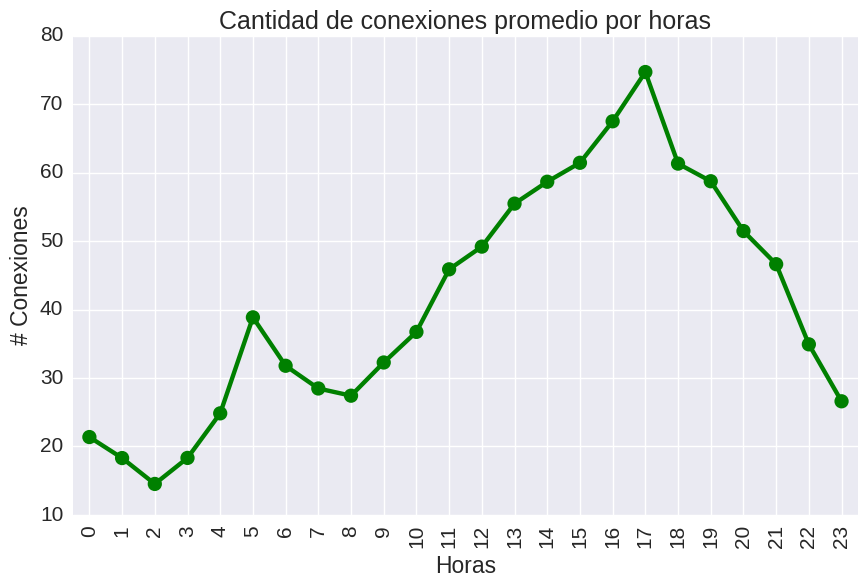

In [21]:
sns.set(font_scale=1.5)
g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=dataAnalisis1_1.reset_index(), color = "Green", size=6, aspect=1.5)
plt.xticks(rotation=90)
plt.xlabel("Horas")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio por horas") 
plt.show()

## mismo grafico sin datos de aeropuerto

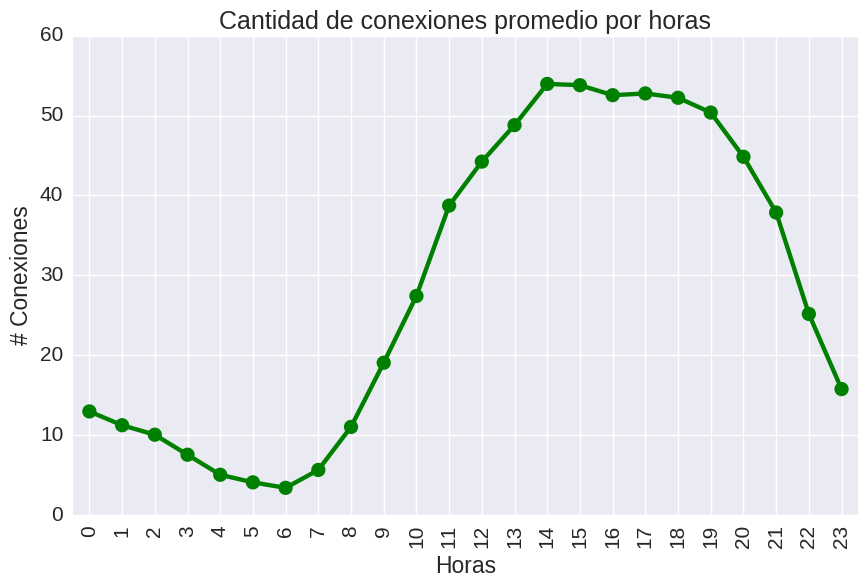

In [22]:
sns.set(font_scale=1.5)
g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_alternative_1_1.reset_index(), color = "Green", size=6, aspect=1.5)
plt.xticks(rotation=90)
plt.xlabel("Horas")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio por horas") 
plt.show()

## Analisis en base de la localizacion

In [23]:
def sacarMes(fecha):
    aux = str(fecha).split("-")
    return "-".join(aux[:2])

In [24]:
dataLocalizacion =data_completaAnalisis1_Agrup.reset_index().copy()


dataLocalizacion["mes"] = dataLocalizacion["fecha"].apply(lambda x: sacarMes(x))
# agrupamos por mes apra sacar las cantidades por mes por localizacion
dataLocalizacion = dataLocalizacion[["fecha", "cant_conexiones", "mes", "localizacion"]].groupby(["mes", "localizacion"]).sum().reset_index()
#ahora, sacamos la media por mes, por localizacion
dataLocalizacion= dataLocalizacion.groupby("localizacion").mean().add_prefix("mean_")
# ordenamos el dataset en base a las conexiones promedio por mes
dataLocalizacion = dataLocalizacion.reset_index().sort_values("mean_cant_conexiones", ascending = False).reset_index()
dataLocalizacion

,index,localizacion,mean_cant_conexiones
0,0,Aeropuerto,101076.200000
1,6,MallSur,39976.666667
2,3,CityMall,38820.166667
3,2,CentroConvenciones,29262.500000
4,9,Samborondon,12797.692308
5,11,Urdesa,6993.181818
6,1,AlbanBorja,3796.812500
7,5,MallSol,3378.750000
8,10,UniversidadGuayaquil,1841.000000
9,7,Penias,1835.428571


## Graficando

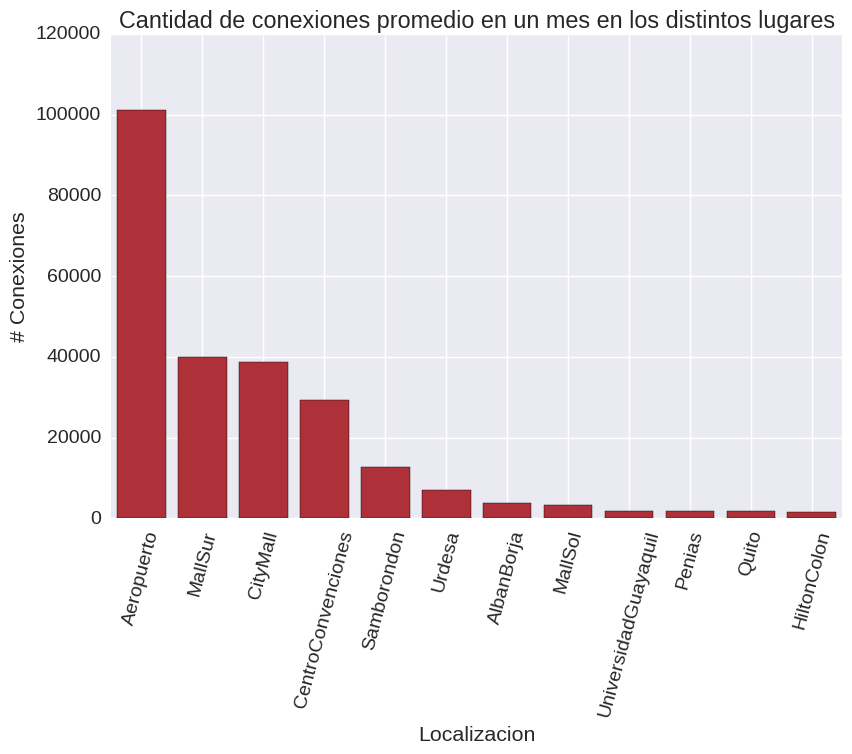

In [25]:
sns.set(font_scale=1.4)
cm = plt.cm.get_cmap('RdYlBu_r')
g = sns.factorplot(x="localizacion", y="mean_cant_conexiones", data=dataLocalizacion, color = cm(240), size=6, aspect=1.5, kind = "bar")
plt.xticks(rotation=75)
plt.xlabel("Localizacion")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio en un mes en los distintos lugares") 
plt.show()

### Agrupando lugares de pocas conexiones al mes 

Existen muchas localizaciones, se ha decidio mantener el top#5 y agregar una nueva categoria llamada OTHER a el resto de lugares.

In [26]:
top5 = dataLocalizacion[0:5].set_index("localizacion").to_dict("index")
top5

{'Aeropuerto': {'index': 0.0, 'mean_cant_conexiones': 101076.2},
 'CentroConvenciones': {'index': 2.0, 'mean_cant_conexiones': 29262.5},
 'CityMall': {'index': 3.0, 'mean_cant_conexiones': 38820.166666666664},
 'MallSur': {'index': 6.0, 'mean_cant_conexiones': 39976.666666666664},
 'Samborondon': {'index': 9.0, 'mean_cant_conexiones': 12797.692307692309}}

In [27]:
def FiltrarLugares(top5, lugar):
    if lugar not in top5:
        return "OTHER"
    return lugar

In [28]:
dataLocalizacionFiltrada= dataLocalizacion.copy()
dataLocalizacionFiltrada["localizacion_filtrada"] = dataLocalizacionFiltrada["localizacion"].apply(lambda x: FiltrarLugares(top5, x))
dataLocalizacionFiltrada = dataLocalizacionFiltrada.groupby("localizacion_filtrada").sum().reset_index()
dataLocalizacionFiltrada = dataLocalizacionFiltrada.sort_values("mean_cant_conexiones", ascending = False).reset_index()
dataLocalizacionFiltrada

,level_0,localizacion_filtrada,index,mean_cant_conexiones
0,0,Aeropuerto,0,101076.200000
1,3,MallSur,6,39976.666667
2,2,CityMall,3,38820.166667
3,1,CentroConvenciones,2,29262.500000
4,4,OTHER,46,21230.797890
5,5,Samborondon,9,12797.692308


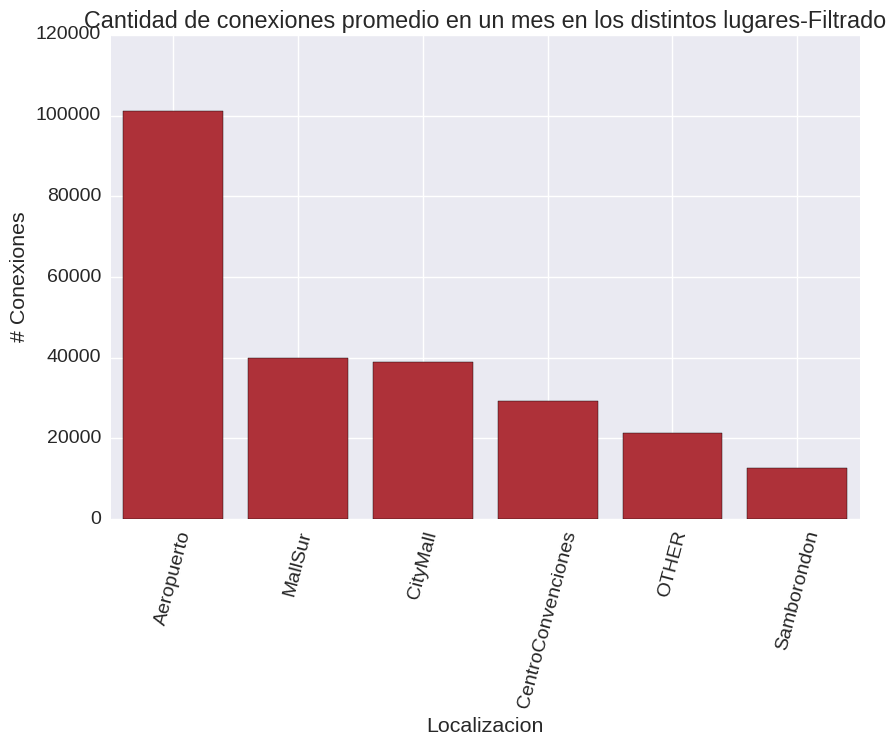

In [29]:
cm = plt.cm.get_cmap('RdYlBu_r')
g = sns.factorplot(x="localizacion_filtrada", y="mean_cant_conexiones", data=dataLocalizacionFiltrada, color = cm(240), size=6, aspect=1.5, kind = "bar")
plt.xticks(rotation=75)
plt.xlabel("Localizacion")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio en un mes en los distintos lugares-Filtrado") 
plt.show()

## Analisis especifico diferenciando por localizaciones 

In [30]:
dataAnalisis1_2 = data_completaAnalisis1.copy()
dataAnalisis1_2["localizacion_filtrada"] = dataAnalisis1_2["localizacion"].apply(lambda x: FiltrarLugares(top5, x))
dataAnalisis1_2 = dataAnalisis1_2.groupby(["localizacion_filtrada", "fecha", "hora"]).size().rename("cant_conexiones").reset_index()
dataAnalisis1_2 = dataAnalisis1_2.groupby(["localizacion_filtrada", "hora"]).mean().add_prefix("mean_").reset_index()
dataAnalisis1_2

,localizacion_filtrada,hora,mean_cant_conexiones
0,Aeropuerto,0,117.957265
1,Aeropuerto,1,85.652174
2,Aeropuerto,2,45.895652
3,Aeropuerto,3,79.782609
4,Aeropuerto,4,117.504348
5,Aeropuerto,5,183.104348
6,Aeropuerto,6,195.730435
7,Aeropuerto,7,228.852174
8,Aeropuerto,8,232.286957
9,Aeropuerto,9,225.017241


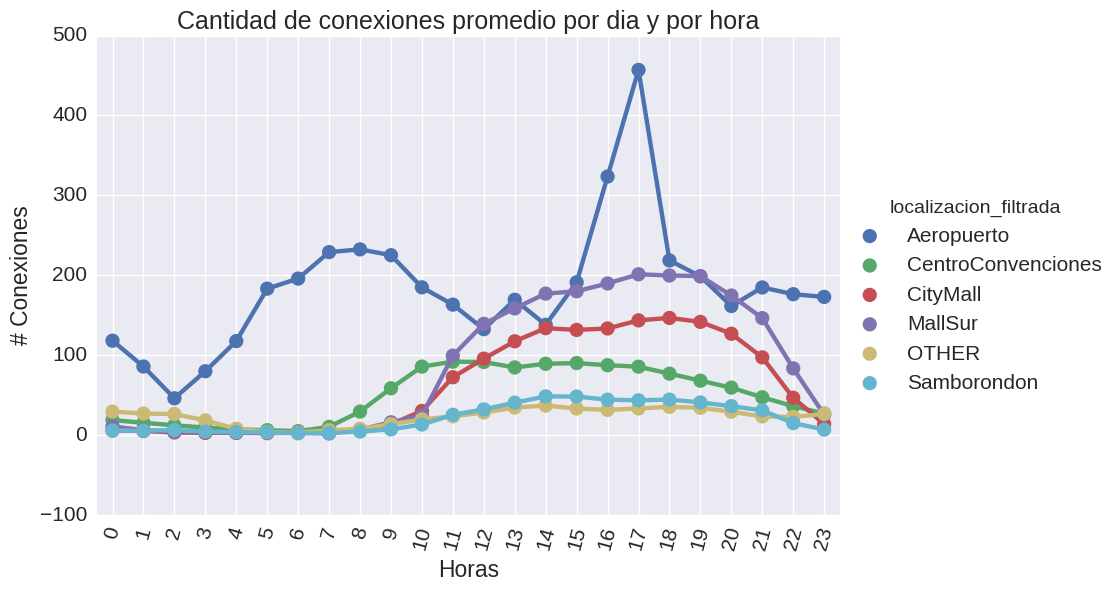

In [31]:
sns.set(font_scale=1.5)
g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=dataAnalisis1_2, size=6, aspect=1.5, hue = "localizacion_filtrada")
plt.xticks(rotation=75)
plt.xlabel("Horas")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio por dia y por hora") 
plt.show()

In [32]:
# veamos paso a paso que se está haciendo:
# dato1melt no distingue por localizacion
dato1melt = dataAnalisis1_1.reset_index().rename(columns={'hora': 'hora', 'mean_cant_conexiones': 'TODOS'})
#dato2melt distingue por localizacion, y se lo expande horizontalmente
dato2melt = dataAnalisis1_2.pivot(index='hora', columns='localizacion_filtrada', values='mean_cant_conexiones').reset_index()
# datamerged contiene la columna TODOS para cada hora
datamerged = pd.merge(dato1melt, dato2melt, on = "hora")
dataUnif = pd.melt(datamerged, id_vars=['hora'], var_name='localizacion_filtrada', value_name='mean_cant_conexiones')
dataUnif
# dato1melt.head()

,hora,localizacion_filtrada,mean_cant_conexiones
0,0,TODOS,21.378341
1,1,TODOS,18.310174
2,2,TODOS,14.529924
3,3,TODOS,18.329870
4,4,TODOS,24.839204
5,5,TODOS,38.858108
6,6,TODOS,31.788190
7,7,TODOS,28.471530
8,8,TODOS,27.417526
9,9,TODOS,32.266040


In [33]:
dataAnalisis2 = data_completa.copy()[["fecha", "localizacion", "mac_usr", "so", "navegador"]]
dataAnalisis2["mes"] = dataAnalisis2["fecha"].apply(lambda x: sacarMes(x))
dataAnalisis2["localizacion_filtrada"] = dataAnalisis2["localizacion"].apply(lambda x: FiltrarLugares(top5, x))

dataAnalisis2.head(2)

,fecha,localizacion,mac_usr,so,navegador,mes,localizacion_filtrada
0,2015-05-15,CityMall,74:AA:FE:A5:7E:90,ANDROID,CHROME,2015-05,CityMall
1,2015-05-15,CityMall,74:AA:FE:A5:7E:90,ANDROID,CHROME,2015-05,CityMall


## -SO

In [34]:
dataAnalisis2SO = dataAnalisis2.groupby(["mes","so"]).size().rename("cant_conexiones").reset_index()
dataAnalisis2SO = dataAnalisis2SO.groupby(["so"]).mean().add_prefix("mean_").reset_index()
dataAnalisis2SO = dataAnalisis2SO.sort_values("mean_cant_conexiones", ascending = False).reset_index()
dataAnalisis2SO

,index,so,mean_cant_conexiones
0,0,ANDROID,70496.875000
1,7,iOS,29072.375000
2,4,Other,5057.187500
3,5,WINDOWS,4368.375000
4,3,NOKIA,965.375000
5,6,WINPHONE,352.750000
6,1,BLACKBERRY,306.666667
7,2,LINUX,129.285714


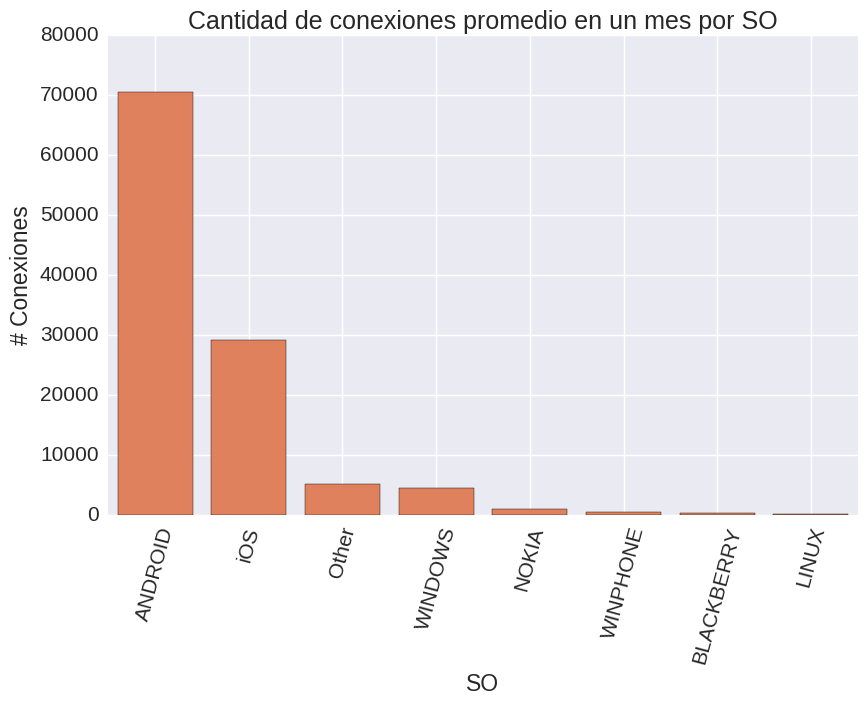

In [35]:
cm = plt.cm.get_cmap('RdYlBu_r')
g = sns.factorplot(x="so", y="mean_cant_conexiones", data=dataAnalisis2SO, color = cm(200), size=6, aspect=1.5, kind = "bar")
plt.xticks(rotation=75)
plt.xlabel("SO")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio en un mes por SO") 
plt.show()

In [36]:
dataAnalisis2SOLocalizacion = dataAnalisis2.groupby(["localizacion_filtrada","mes","so"]).size().rename("cant_conexiones").reset_index()
dataAnalisis2SOLocalizacion = dataAnalisis2SOLocalizacion.groupby(["localizacion_filtrada","so"]).mean().add_prefix("mean_").reset_index()
dataAnalisis2SOLocalizacion = dataAnalisis2SOLocalizacion.sort_values(["localizacion_filtrada","mean_cant_conexiones"], ascending = [True,False]).reset_index()
dataAnalisis2SOLocalizacion

,index,localizacion_filtrada,so,mean_cant_conexiones
0,0,Aeropuerto,ANDROID,51339.600000
1,6,Aeropuerto,iOS,44778.600000
2,5,Aeropuerto,WINDOWS,3574.200000
3,3,Aeropuerto,NOKIA,621.200000
4,4,Aeropuerto,Other,393.000000
5,1,Aeropuerto,BLACKBERRY,224.000000
6,2,Aeropuerto,LINUX,182.000000
7,7,CentroConvenciones,ANDROID,19031.571429
8,14,CentroConvenciones,iOS,7606.428571
9,12,CentroConvenciones,WINDOWS,1149.285714


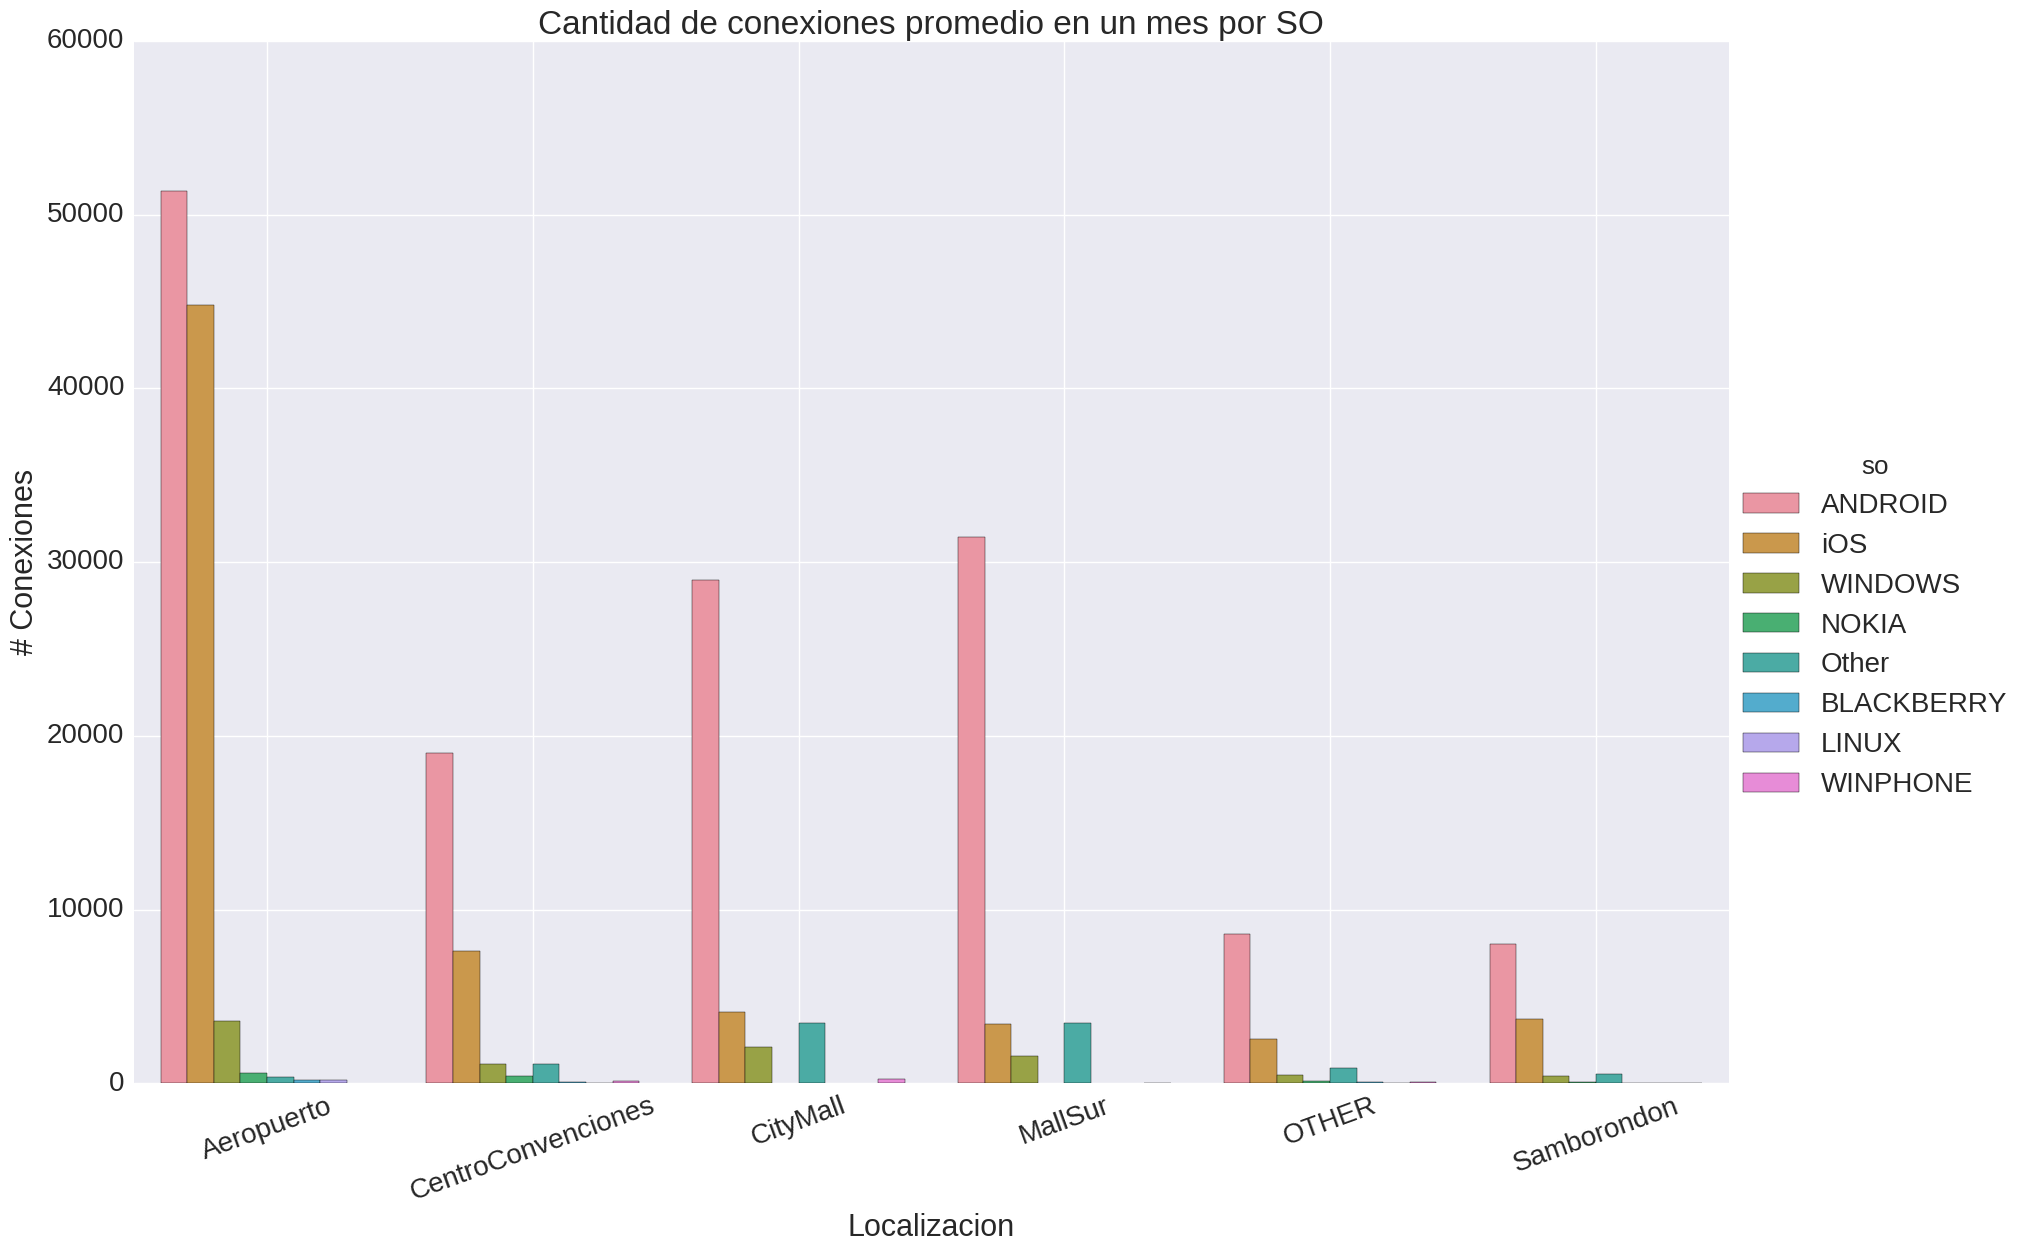

In [37]:
sns.set(font_scale=2)
cm = plt.cm.get_cmap('RdYlBu_r')
g = sns.factorplot(x="localizacion_filtrada", y="mean_cant_conexiones", data=dataAnalisis2SOLocalizacion, size=12, aspect=1.5, kind = "bar", hue = "so")
plt.xticks(rotation=20)
plt.xlabel("Localizacion")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio en un mes por SO") 
plt.show()

## -Navegador 

In [38]:
dataAnalisis2Nav = dataAnalisis2.groupby(["mes","navegador"]).size().rename("cant_conexiones").reset_index()
dataAnalisis2Nav = dataAnalisis2Nav.groupby(["navegador"]).mean().add_prefix("mean_").reset_index()
dataAnalisis2Nav = dataAnalisis2Nav.sort_values("mean_cant_conexiones", ascending = False).reset_index()
dataAnalisis2Nav

,index,navegador,mean_cant_conexiones
0,1,CHROME,50589.000000
1,4,OTHER,29898.562500
2,5,SAFARI,26584.500000
3,3,IE,1542.625000
4,2,FIREFOX,1075.875000
5,0,BLACKBERRY,277.833333


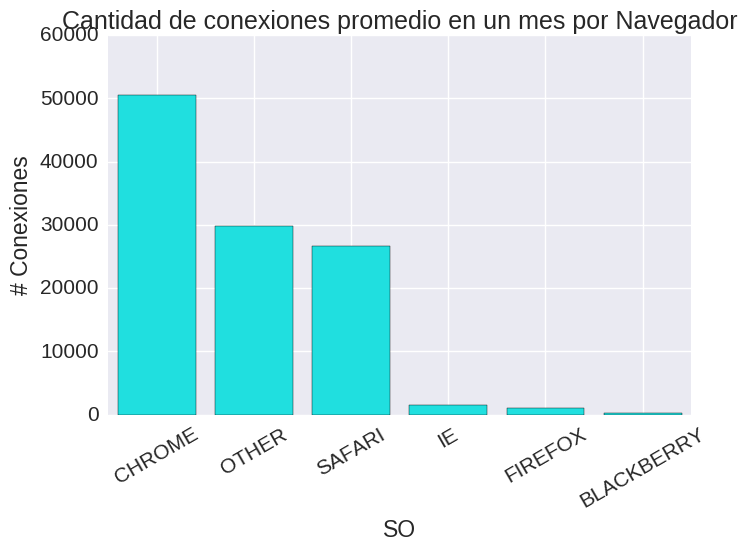

In [39]:
sns.set(font_scale=1.5)
cm = plt.cm.get_cmap('RdYlBu_r')
g = sns.factorplot(x="navegador", y="mean_cant_conexiones", data=dataAnalisis2Nav, color = "Cyan", size=5, aspect=1.5, kind = "bar")
plt.xticks(rotation=30)
plt.xlabel("SO")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio en un mes por Navegador") 
plt.show()

In [ ]:
dataAnalisis2NavLocalizacion = dataAnalisis2.groupby(["localizacion_filtrada","mes","navegador"]).size().rename("cant_conexiones").reset_index()
dataAnalisis2NavLocalizacion = dataAnalisis2NavLocalizacion.groupby(["localizacion_filtrada","navegador"]).mean().add_prefix("mean_").reset_index()
dataAnalisis2NavLocalizacion = dataAnalisis2NavLocalizacion.sort_values(["localizacion_filtrada","mean_cant_conexiones"], ascending = [True,False]).reset_index()
dataAnalisis2NavLocalizacion

In [ ]:
sns.set(font_scale=2)
cm = plt.cm.get_cmap('RdYlBu_r')
g = sns.factorplot(x="localizacion_filtrada", y="mean_cant_conexiones", data=dataAnalisis2NavLocalizacion, size=12, aspect=1.5, kind = "bar", hue = "navegador")
plt.xticks(rotation=20)
plt.xlabel("Localizacion")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio en un mes por Navegador") 
plt.show()

# Categorizando a los usuarios en base a que tanto frecuentan las localizaciones en un mes

In [41]:
dataAnalisis3 = data_completa.copy()[["fecha", "localizacion", "mac_usr"]]
dataAnalisis3["mes"] = dataAnalisis3["fecha"].apply(lambda x: sacarMes(x))
dataAnalisis3["localizacion_filtrada"] = dataAnalisis3["localizacion"].apply(lambda x: FiltrarLugares(top5, x))
dataAnalisis3.head(3)

,fecha,localizacion,mac_usr,mes,localizacion_filtrada
0,2015-05-15,CityMall,74:AA:FE:A5:7E:90,2015-05,CityMall
1,2015-05-15,CityMall,74:AA:FE:A5:7E:90,2015-05,CityMall
2,2015-05-15,CityMall,B4:52:7E:3F:CF:B4,2015-05,CityMall


In [42]:
dataAnalisis3 = dataAnalisis3.groupby(["mes", "localizacion_filtrada", "mac_usr"]).size().rename("cant_conexiones").reset_index()
dataAnalisis3 = dataAnalisis3.groupby(["mac_usr","localizacion_filtrada"]).mean().add_prefix("mean_").reset_index()
dataAnalisis3 =dataAnalisis3.sort_values("mean_cant_conexiones", ascending = False)
dataAnalisis3

,mac_usr,localizacion_filtrada,mean_cant_conexiones
194763,78:C3:E9:30:BB:44,CentroConvenciones,1864.000000
83273,2C:F0:EE:0F:64:C6,OTHER,981.000000
395928,FC:DB:B3:2B:99:40,CentroConvenciones,612.000000
169607,68:76:4F:69:65:8B,OTHER,558.400000
14874,00:73:E0:AD:73:07,OTHER,543.000000
354282,E4:98:D6:8B:02:A3,CentroConvenciones,489.000000
331460,D0:92:9E:0F:27:14,Aeropuerto,485.333333
273688,AC:B5:7D:66:DE:11,MallSur,380.000000
364616,EC:1F:72:5C:02:74,CentroConvenciones,373.000000
208457,84:2E:27:FF:31:F1,CityMall,358.000000


## Top 5 usuarios por lugar

In [43]:
dataAnalisis3_top_users = dataAnalisis3.sort_values(["localizacion_filtrada","mean_cant_conexiones"], ascending = [False,False])
# obteniendo top5 usuarios por localizacion
dataAnalisis3_top_users = dataAnalisis3_top_users.groupby(['localizacion_filtrada'], sort=False).head(5)

In [44]:
dataAnalisis3_top_users.to_csv("macs_tops_usuarios.csv")

In [45]:
lista_top_macs = dataAnalisis3_top_users.mac_usr.tolist()
len(lista_top_macs)

30

In [46]:
# horas de conexion de los top usuarios
data_top_usuarios = data_completa[data_completa['mac_usr'].isin(lista_top_macs)][['fecha','hora', 'weekday', 'localizacion','mac_usr', 'so', 'navegador']]
data_top_usuarios = data_top_usuarios.sort_values(["localizacion","hora", "mac_usr"], ascending=True)
# data_top_usuarios.mac_usr
data_top_usuarios.localizacion.value_counts()
data_top_usuarios2 = data_top_usuarios.copy()
data_top_usuarios_aeropuerto = data_top_usuarios2[data_top_usuarios2['localizacion']=="Aeropuerto"]
data_top_usuarios_centroconvenciones = data_top_usuarios2[data_top_usuarios2['localizacion']=="CentroConvenciones"]
data_top_usuarios_citymall = data_top_usuarios2[data_top_usuarios2['localizacion']=="CityMall"]
data_top_usuarios_mallsur = data_top_usuarios2[data_top_usuarios2['localizacion']=="MallSur"]
data_top_usuarios_samborondon = data_top_usuarios2[data_top_usuarios2['localizacion']=="Samborondon"]
data_top_usuarios_penias = data_top_usuarios2[data_top_usuarios2['localizacion']=="Penias"]
data_top_usuarios_urdesa = data_top_usuarios2[data_top_usuarios2['localizacion']=="Urdesa"]
data_top_usuarios_mallsol = data_top_usuarios2[data_top_usuarios2['localizacion']=="MallSol"]
# data_top_usuarios_albanborja = data_top_usuarios2[data_top_usuarios['localizacion']=="AlbanBorja"]

In [47]:
data_top_usuarios = data_top_usuarios.groupby(['mac_usr', 'fecha' ,'hora']).size().rename("cant_conexiones").reset_index()
data_top_usuarios_aeropuerto = data_top_usuarios_aeropuerto.groupby(['mac_usr', 'fecha' ,'hora']).size().rename("cant_conexiones").reset_index()
data_top_usuarios_centroconvenciones = data_top_usuarios_centroconvenciones.groupby(['mac_usr', 'fecha' ,'hora']).size().rename("cant_conexiones").reset_index()
data_top_usuarios_citymall = data_top_usuarios_citymall.groupby(['mac_usr', 'fecha' ,'hora']).size().rename("cant_conexiones").reset_index()
data_top_usuarios_mallsur = data_top_usuarios_mallsur.groupby(['mac_usr', 'fecha' ,'hora']).size().rename("cant_conexiones").reset_index()
data_top_usuarios_samborondon = data_top_usuarios_samborondon.groupby(['mac_usr', 'fecha' ,'hora']).size().rename("cant_conexiones").reset_index()
data_top_usuarios_penias = data_top_usuarios_penias.groupby(['mac_usr', 'fecha' ,'hora']).size().rename("cant_conexiones").reset_index()
data_top_usuarios_urdesa = data_top_usuarios_urdesa.groupby(['mac_usr', 'fecha' ,'hora']).size().rename("cant_conexiones").reset_index()
data_top_usuarios_mallsol = data_top_usuarios_mallsol.groupby(['mac_usr', 'fecha' ,'hora']).size().rename("cant_conexiones").reset_index()


In [48]:
data_top_usuarios = data_top_usuarios.groupby(["mac_usr", "hora"]).mean().add_prefix("mean_").reset_index()
data_top_usuarios_aeropuerto = data_top_usuarios_aeropuerto.groupby(["mac_usr", "hora"]).mean().add_prefix("mean_").reset_index()
data_top_usuarios_centroconvenciones = data_top_usuarios_centroconvenciones.groupby(["mac_usr", "hora"]).mean().add_prefix("mean_").reset_index()
data_top_usuarios_citymall = data_top_usuarios_citymall.groupby(["mac_usr", "hora"]).mean().add_prefix("mean_").reset_index()
data_top_usuarios_mallsur = data_top_usuarios_mallsur.groupby(["mac_usr", "hora"]).mean().add_prefix("mean_").reset_index()
data_top_usuarios_samborondon = data_top_usuarios_samborondon.groupby(["mac_usr", "hora"]).mean().add_prefix("mean_").reset_index()
data_top_usuarios_penias = data_top_usuarios_penias.groupby(["mac_usr", "hora"]).mean().add_prefix("mean_").reset_index()
data_top_usuarios_urdesa = data_top_usuarios_urdesa.groupby(["mac_usr", "hora"]).mean().add_prefix("mean_").reset_index()
data_top_usuarios_mallsol = data_top_usuarios_mallsol.groupby(["mac_usr", "hora"]).mean().add_prefix("mean_").reset_index()

## Cantidad de conexiones promedio de top usuarios por hora en el aeropuerto

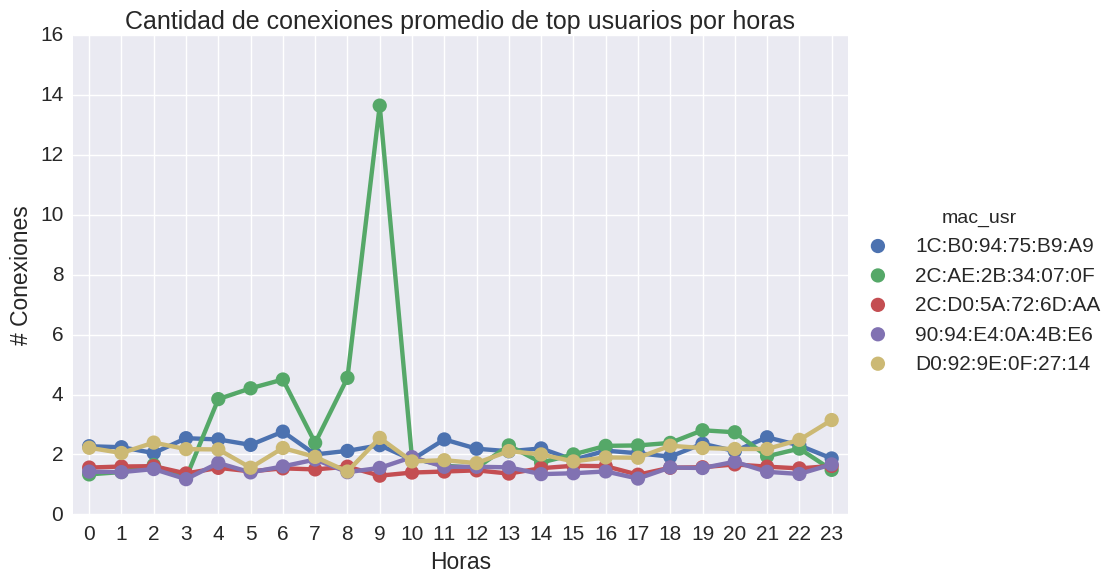

In [49]:
sns.set(font_scale=1.5)
# g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios, size=6, aspect=1.5, hue = "mac_usr")
g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios_aeropuerto, size=6, aspect=1.5, hue = "mac_usr")
plt.xticks(rotation=0)
plt.xlabel("Horas")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio de top usuarios por horas") 
plt.show()

## Cantidad de conexiones promedio de top usuarios por hora en centro de convenciones

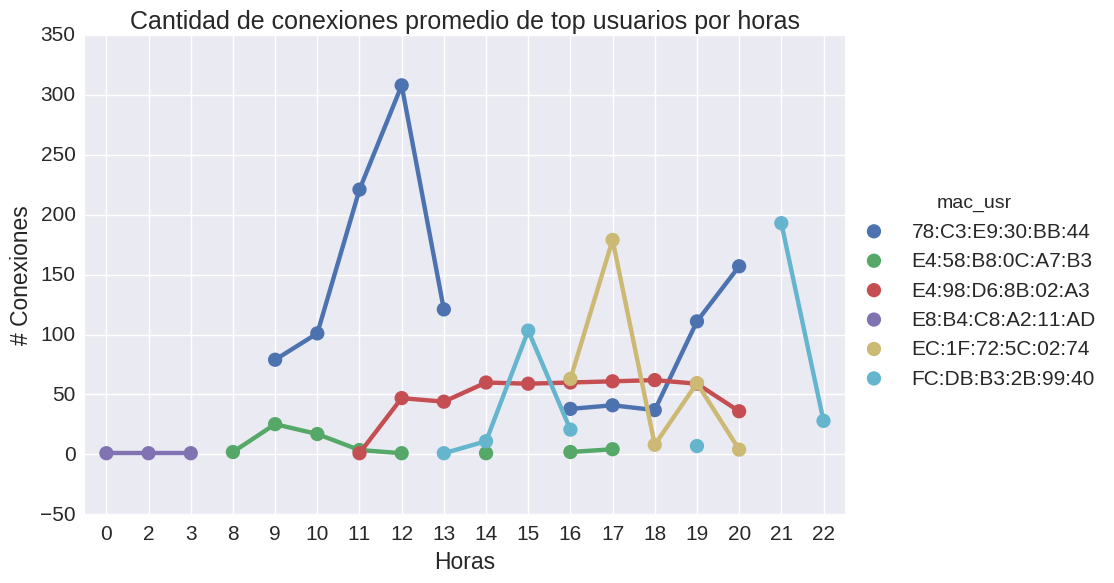

In [50]:
sns.set(font_scale=1.5)
# g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios, size=6, aspect=1.5, hue = "mac_usr")
g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios_centroconvenciones, size=6, aspect=1.5, hue = "mac_usr")
plt.xticks(rotation=0)
plt.xlabel("Horas")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio de top usuarios por horas") 
plt.show()

## Cantidad de conexiones promedio de top usuarios por hora en el CityMall

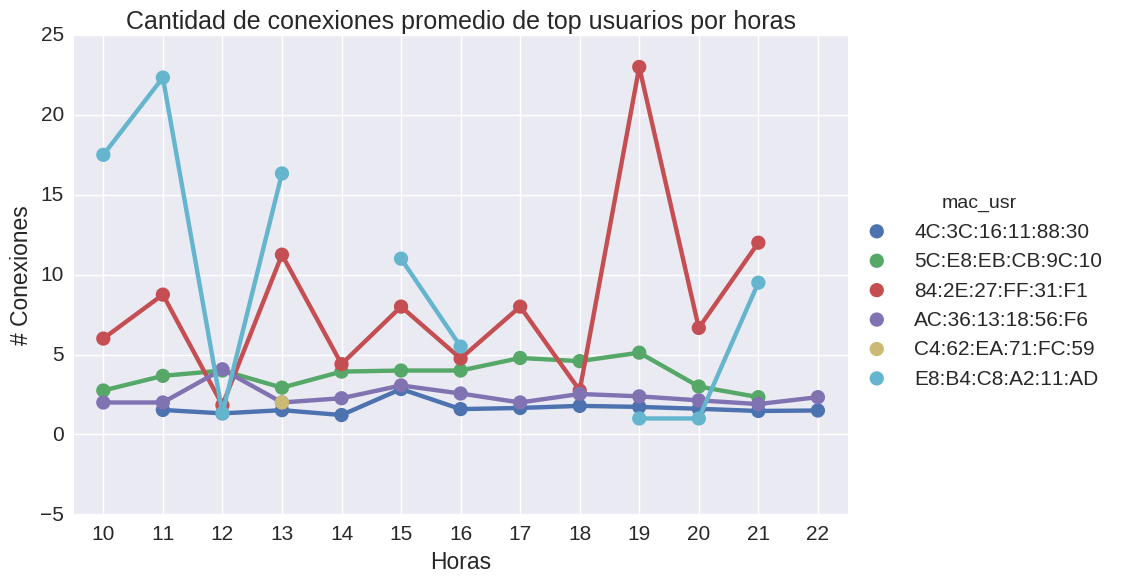

In [51]:
sns.set(font_scale=1.5)
# g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios, size=6, aspect=1.5, hue = "mac_usr")
g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios_citymall, size=6, aspect=1.5, hue = "mac_usr")
plt.xticks(rotation=0)
plt.xlabel("Horas")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio de top usuarios por horas") 
plt.show()

## Cantidad de conexiones promedio de top usuarios por hora en el Mall del Sur

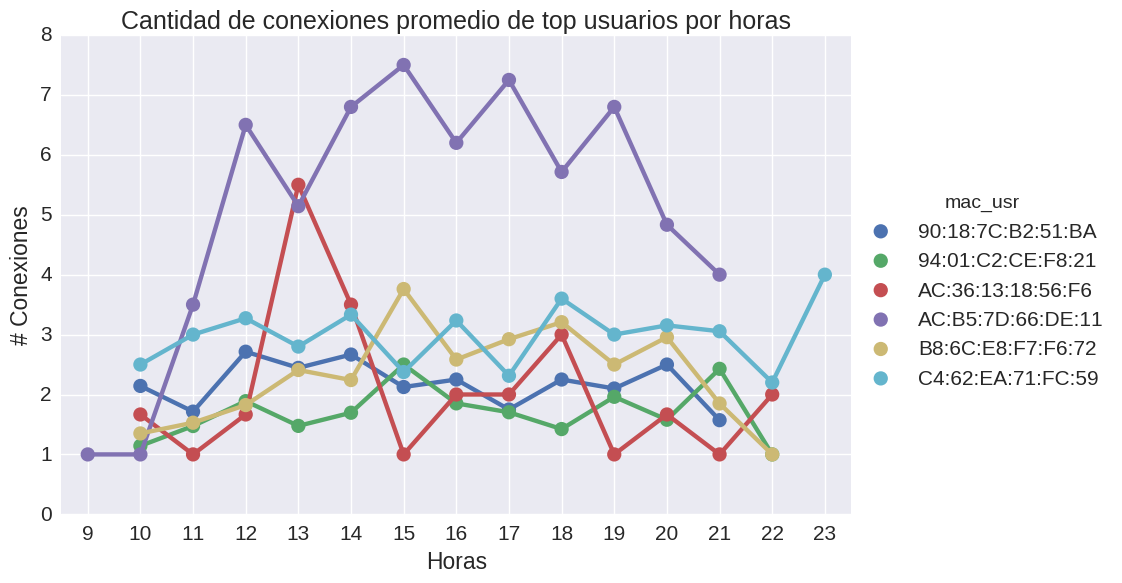

In [52]:
sns.set(font_scale=1.5)
# g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios, size=6, aspect=1.5, hue = "mac_usr")
g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios_mallsur, size=6, aspect=1.5, hue = "mac_usr")
plt.xticks(rotation=0)
plt.xlabel("Horas")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio de top usuarios por horas") 
plt.show()

## Cantidad de conexiones promedio de top usuarios por hora en Samborondon

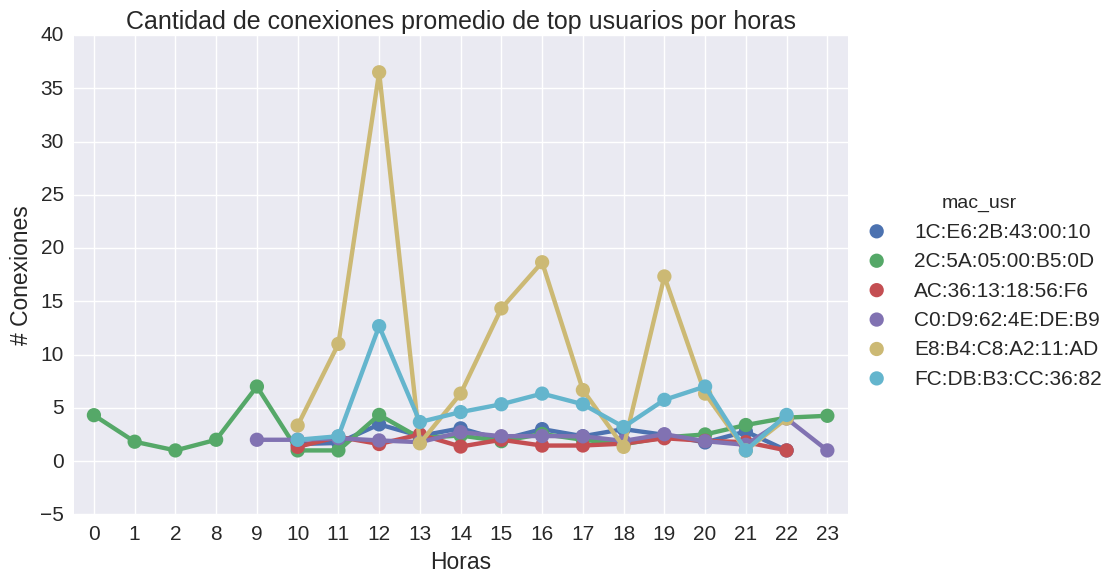

In [53]:
sns.set(font_scale=1.5)
# g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios, size=6, aspect=1.5, hue = "mac_usr")
g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios_samborondon, size=6, aspect=1.5, hue = "mac_usr")
plt.xticks(rotation=0)
plt.xlabel("Horas")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio de top usuarios por horas") 
plt.show()

## Cantidad de conexiones promedio de top usuarios por hora en las Peñas

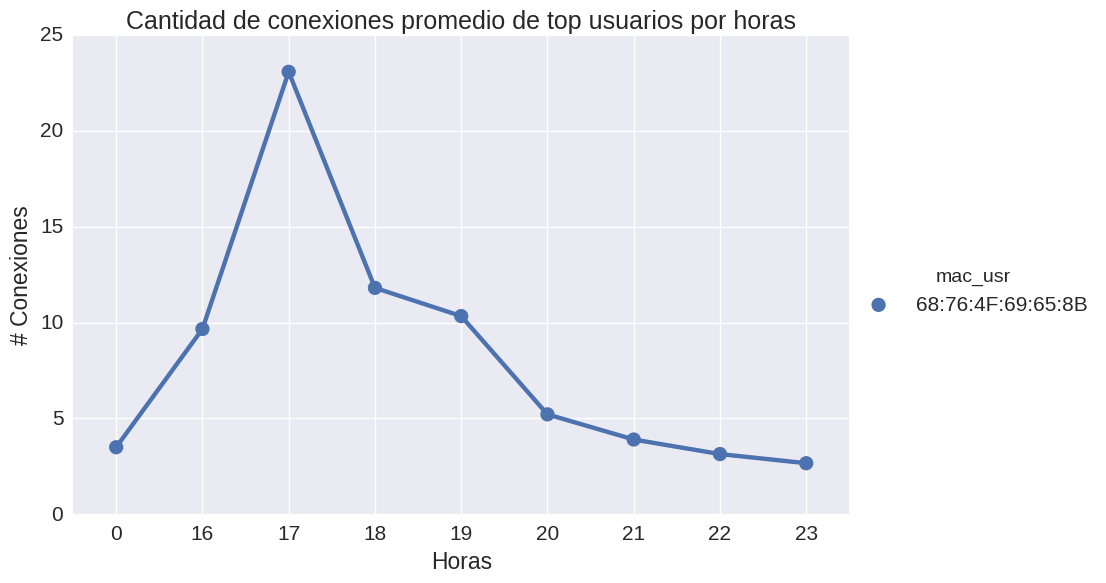

In [54]:
sns.set(font_scale=1.5)
# g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios, size=6, aspect=1.5, hue = "mac_usr")
g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios_penias, size=6, aspect=1.5, hue = "mac_usr")
plt.xticks(rotation=0)
plt.xlabel("Horas")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio de top usuarios por horas") 
plt.show()

## Cantidad de conexiones promedio de top usuarios por hora en Urdesa

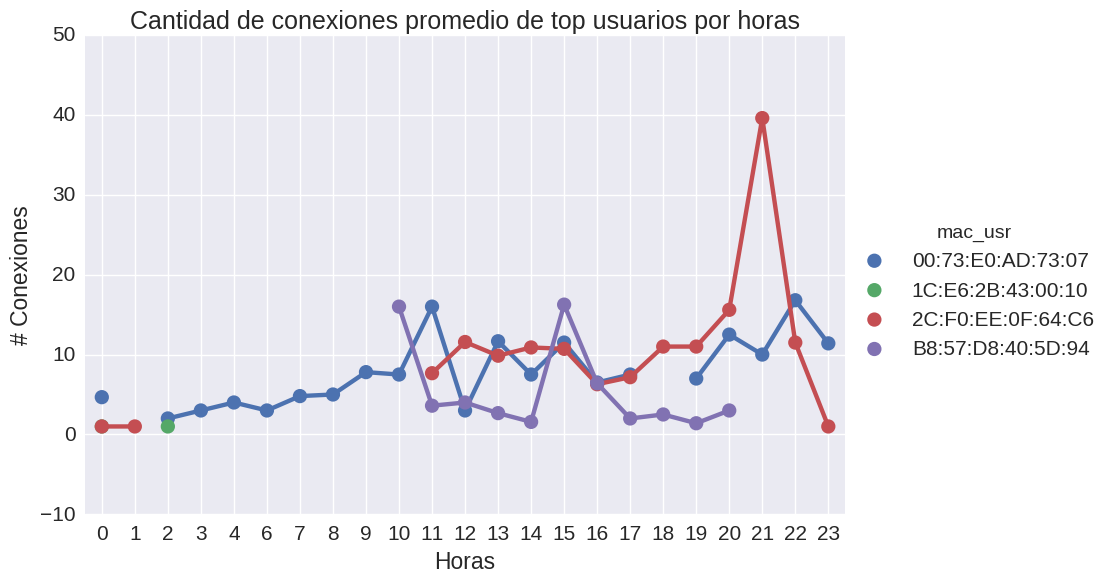

In [55]:
sns.set(font_scale=1.5)
# g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios, size=6, aspect=1.5, hue = "mac_usr")
g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios_urdesa, size=6, aspect=1.5, hue = "mac_usr")
plt.xticks(rotation=0)
plt.xlabel("Horas")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio de top usuarios por horas") 
plt.show()

## Cantidad de conexiones promedio de top usuarios por hora en Mall del Sol

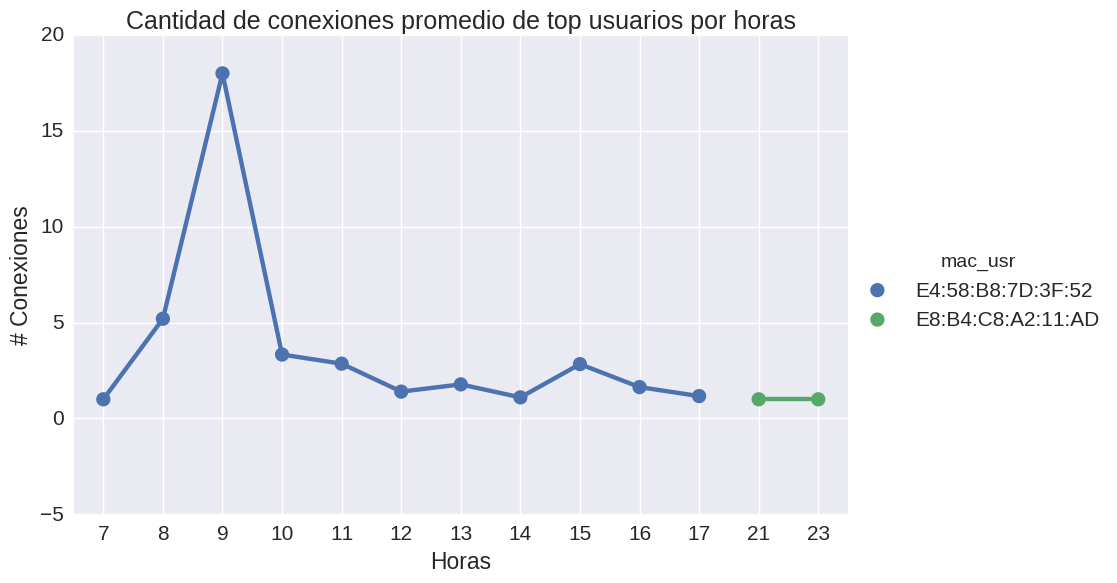

In [56]:
sns.set(font_scale=1.5)
# g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios, size=6, aspect=1.5, hue = "mac_usr")
g = sns.factorplot(x="hora", y="mean_cant_conexiones", data=data_top_usuarios_mallsol, size=6, aspect=1.5, hue = "mac_usr")
plt.xticks(rotation=0)
plt.xlabel("Horas")
plt.ylabel("# Conexiones")
plt.grid(True)
plt.title("Cantidad de conexiones promedio de top usuarios por horas") 
plt.show()

In [57]:
dataAnalisis3B = dataAnalisis3.pivot(index='mac_usr', columns='localizacion_filtrada', values='mean_cant_conexiones')
dataAnalisis3B = dataAnalisis3B.fillna(0).reset_index()
columnas =list(dataAnalisis3B)
columnas.remove("mac_usr")
dataAnalisis3B['total'] = dataAnalisis3B[columnas].sum(axis=1)
columnasNueva = ["total"]
for c in columnas:
    columnasNueva += [c]
    dataAnalisis3B[c] =(dataAnalisis3B[c]*100)/dataAnalisis3B["total"]
dataAnalisis3B = pd.melt(dataAnalisis3B, id_vars=["mac_usr", "total"], var_name='localizacion', value_name='%Frecuencia')
dataAnalisis3B.sort_values("total", ascending = False)
# dataAnalisis3B.sort_values("mac_usr")

,mac_usr,total,localizacion,%Frecuencia
904177,78:C3:E9:30:BB:44,1864.0,CityMall,0.000000
1630505,78:C3:E9:30:BB:44,1864.0,OTHER,0.000000
541013,78:C3:E9:30:BB:44,1864.0,CentroConvenciones,100.000000
1267341,78:C3:E9:30:BB:44,1864.0,MallSur,0.000000
1993669,78:C3:E9:30:BB:44,1864.0,Samborondon,0.000000
177849,78:C3:E9:30:BB:44,1864.0,Aeropuerto,0.000000
75841,2C:F0:EE:0F:64:C6,981.0,Aeropuerto,0.000000
802169,2C:F0:EE:0F:64:C6,981.0,CityMall,0.000000
1528497,2C:F0:EE:0F:64:C6,981.0,OTHER,100.000000
439005,2C:F0:EE:0F:64:C6,981.0,CentroConvenciones,0.000000


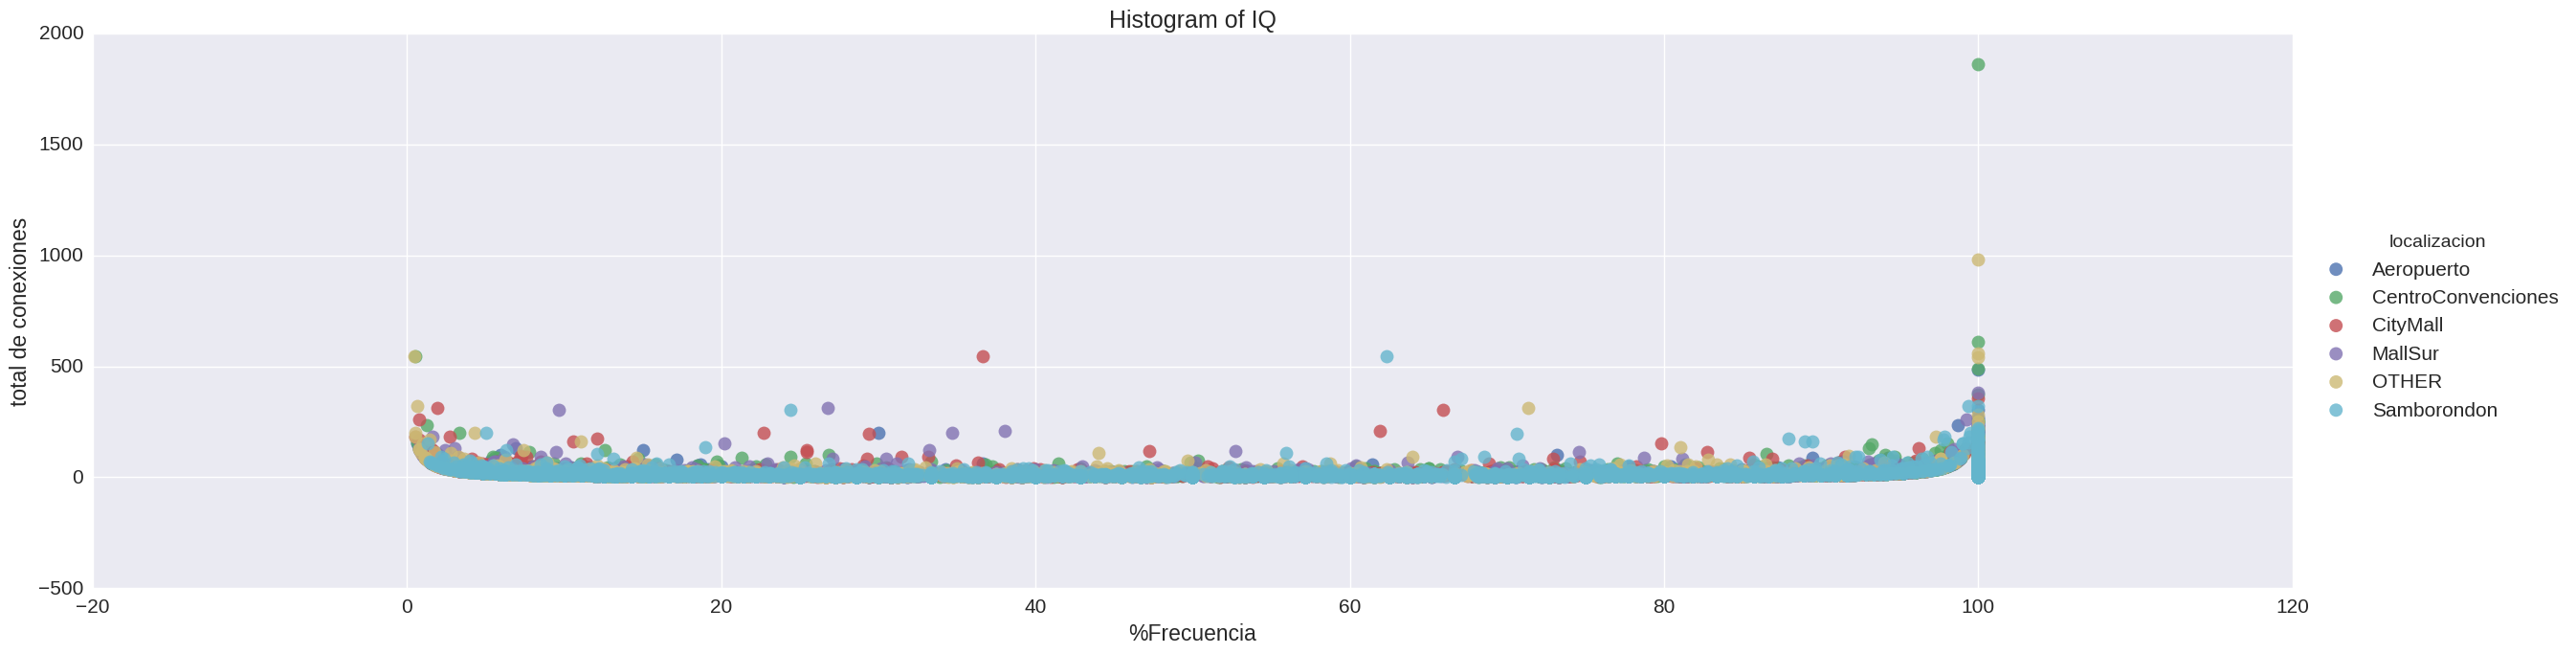

In [58]:
dataAnalisis3BF = dataAnalisis3B[dataAnalisis3B["%Frecuencia"] >0]
sns.lmplot('%Frecuencia', 'total',
           data=dataAnalisis3BF,
           fit_reg=False,  
           scatter_kws={"marker": "D",
                        "s": 100},size=7,aspect=3.5, hue = "localizacion")
plt.title('Histogram of IQ')
plt.xlabel('%Frecuencia')
plt.ylabel('total de conexiones')
plt.show()

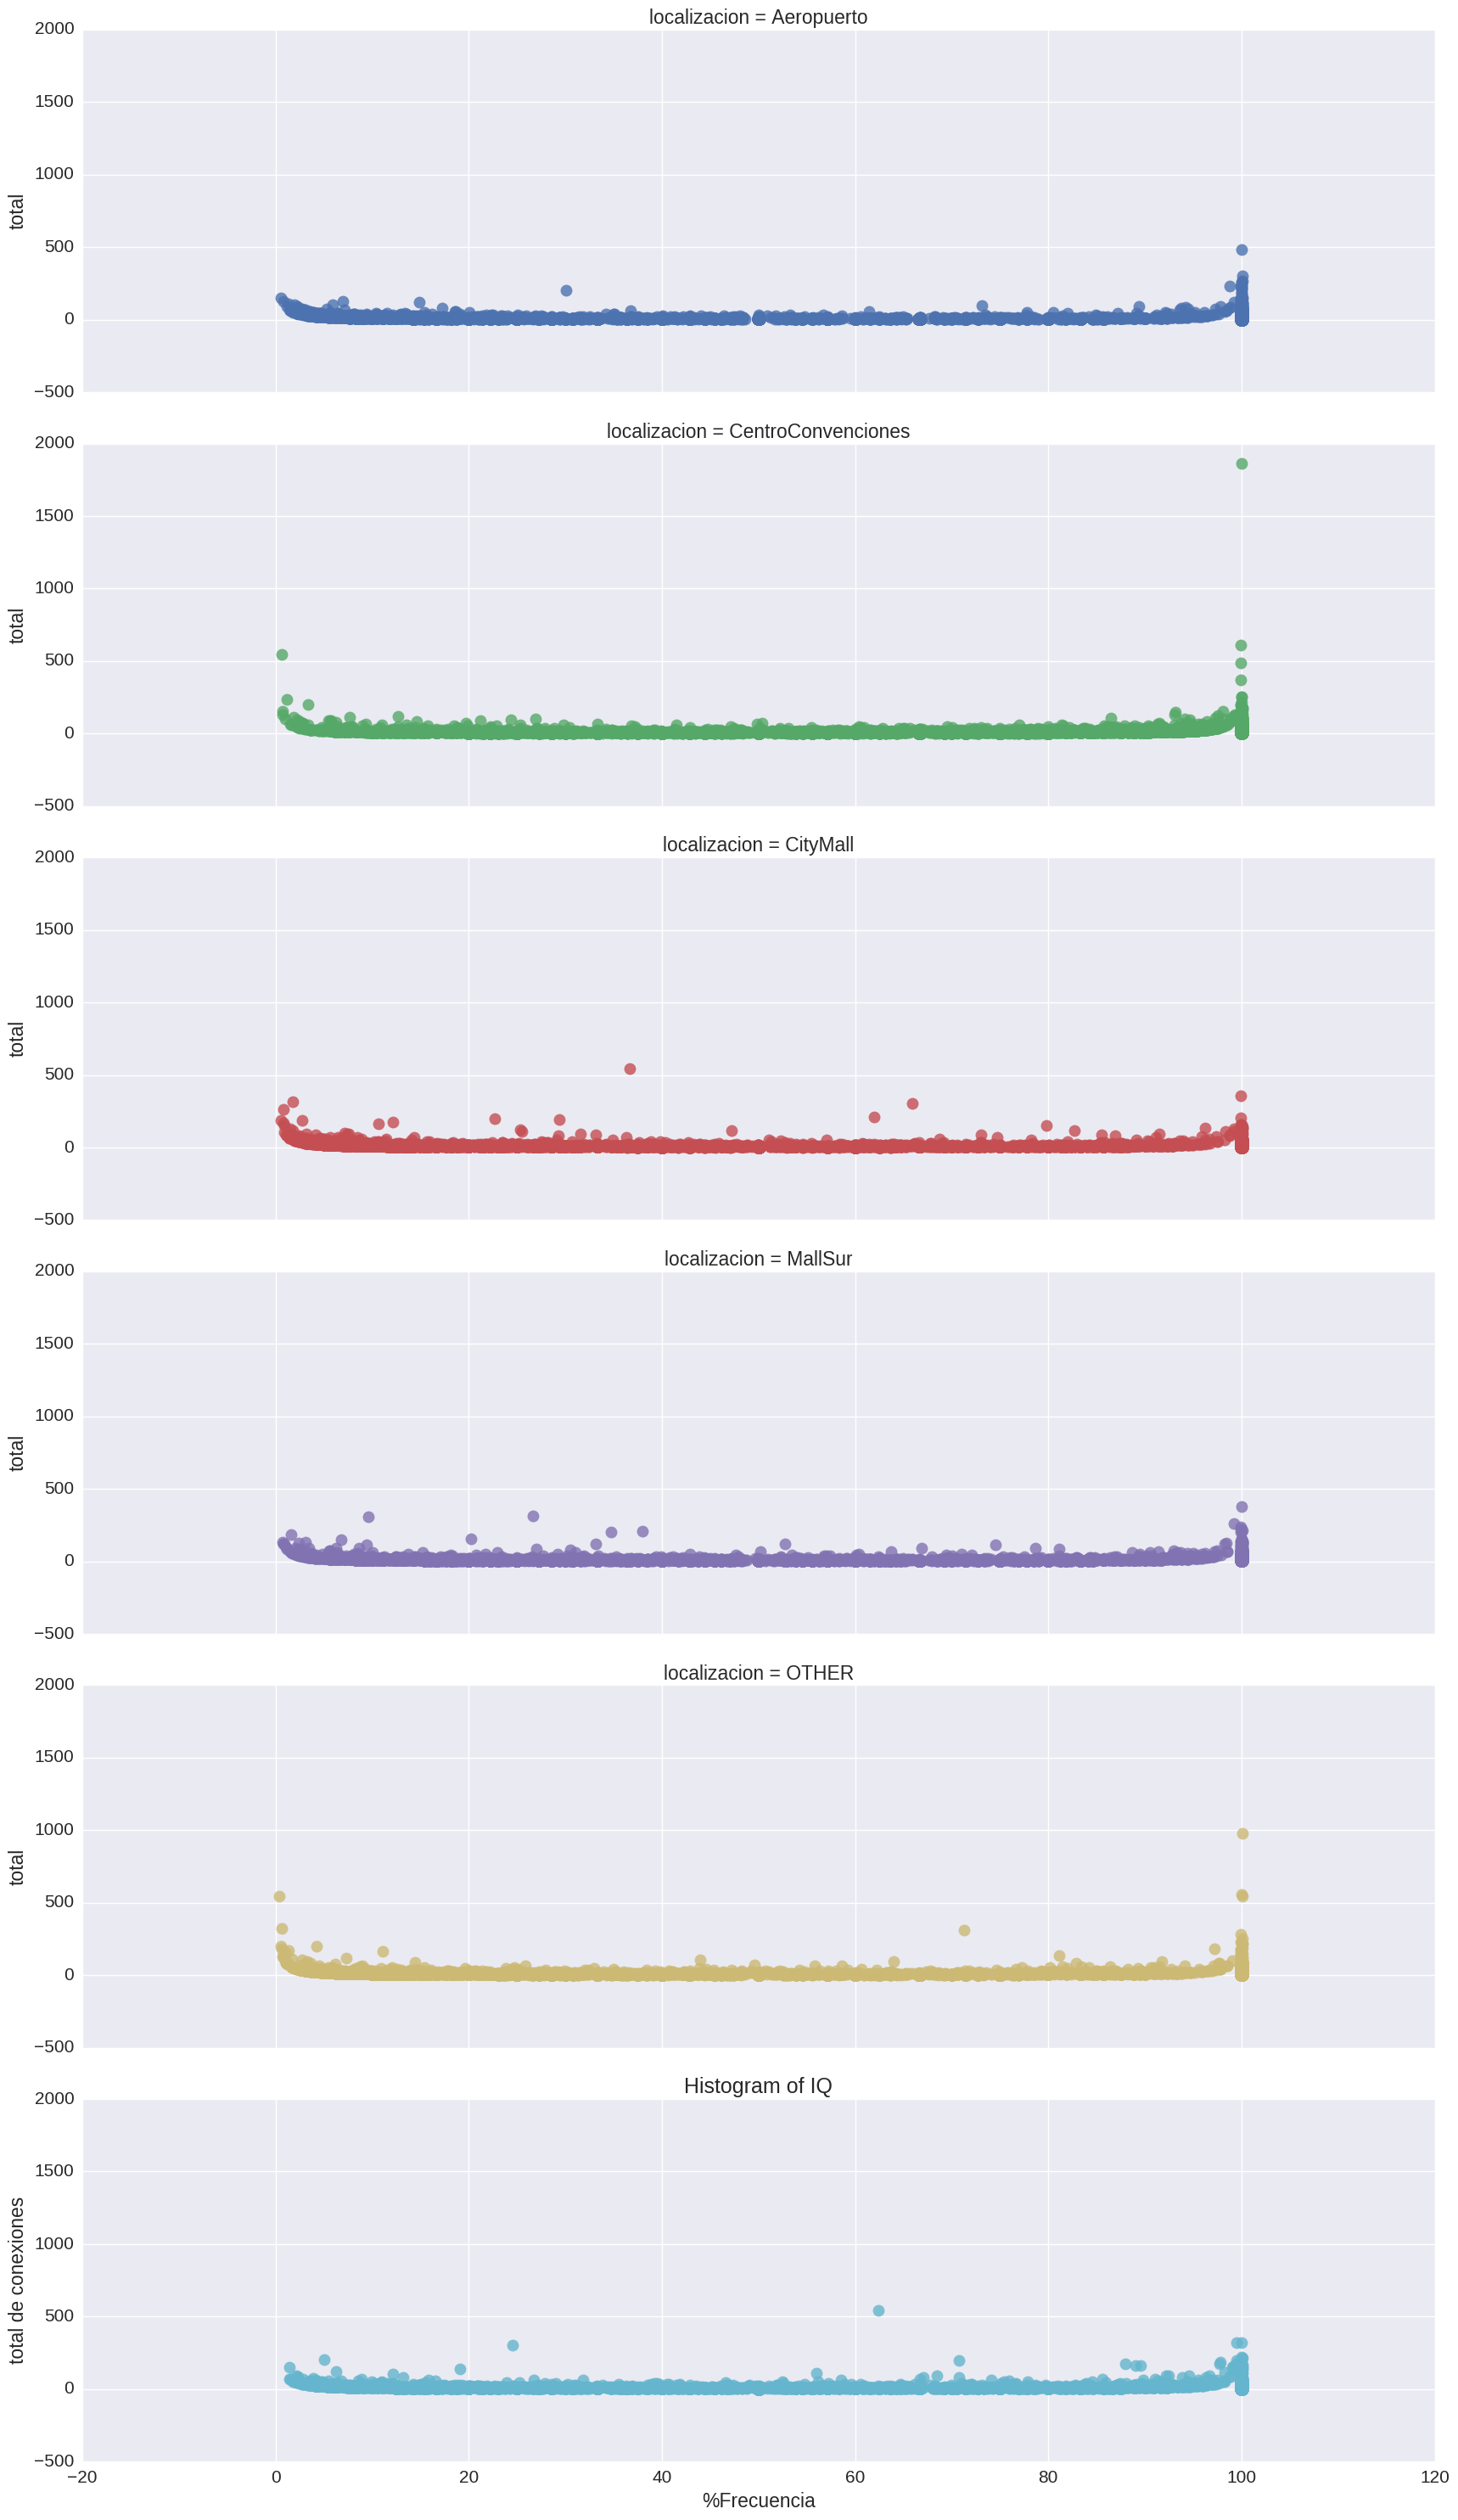

In [59]:
sns.lmplot('%Frecuencia', 'total',
           data=dataAnalisis3BF,
           fit_reg=False,  
           scatter_kws={"marker": "D",
                        "s": 100},size=5, aspect=3.5, hue = "localizacion",row = "localizacion", x_jitter=.1)
plt.title('Histogram of IQ')
plt.xlabel('%Frecuencia')
plt.ylabel('total de conexiones')
plt.show()

In [60]:
import plotly.plotly as py
import plotly
import cufflinks as cf

plotly.tools.set_credentials_file(username='DanielIzquierdo', api_key='s3In15BFpdthgoW1Ow9f')

cf.set_config_file(offline=False, world_readable=True, theme='pearl')

# df = pd.read_csv('http://www.stat.ubc.ca/~jenny/notOcto/STAT545A/examples/gapminder/data/gapminderDataFiveYear.txt', sep='\t')
# df2007 = df[df.year==2007]
# df2007



In [61]:
data2016 = data_completa.copy()
data2016["localizacion_filtrada"] = data2016["localizacion"].apply(lambda x: FiltrarLugares(top5, x))
data2016 = data2016[['localizacion_filtrada','mes']].groupby(['localizacion_filtrada', 'mes']).size().rename('conexiones').reset_index()
connections2016 = data2016.groupby('localizacion_filtrada').mean()
connections = connections2016.reset_index()
connections = connections[['localizacion_filtrada', 'conexiones']]
connections.columns=['CentroComercial','conexiones']
connections

,CentroComercial,conexiones
0,Aeropuerto,101076.200000
1,CentroConvenciones,34139.583333
2,CityMall,38820.166667
3,MallSur,39976.666667
4,OTHER,16875.750000
5,Samborondon,15124.545455


In [62]:
df2016 = pd.merge(connections,expectativa_cc, on='CentroComercial')
df2016 = pd.merge(df2016, aps_cc, on='CentroComercial')
df2016

,CentroComercial,conexiones,poblacion_mensual,#aps
0,Aeropuerto,101076.200000,600000,20
1,CentroConvenciones,34139.583333,55000,33
2,CityMall,38820.166667,1200000,8
3,MallSur,39976.666667,1300000,6
4,Samborondon,15124.545455,750000,11


In [63]:

df2016.iplot(kind='bubble', x='poblacion_mensual', y='#aps', size='conexiones', text='CentroComercial',
             xTitle='Expectativa Mensual del Centro Comercial', yTitle='# de puntos wifi en la zona',
             filename='bubble-chart-wifi-monthly')